# Datan analysointi K2019 - kerta 6

<a href="#1">Hajontakaavio</a>  
<a href="#2">Keskiarvo, varianssi ja keskihajonta</a>  
<a href="#3">Kovarianssi</a>  
<a href="#4">Korrelaatio</a>  
<a href="#5">Selityskerroin</a>  
<a href="#6">Korrelaatiokertoimen "sudenkuoppia"</a>  
<a href="#7">Korrelaation merkitsevyys</a>  
<a href="#8">Spearmanin järjestyskorrelaatio</a>  
<a href="#9">Korrelaatiomatriisi heatmappina</a>  

## Kahden muuttujan välinen riippuvuus
Kahden määrällisen muuttujan riippuvuutta puolestaan tarkastellaan hajontakaavion ja korrelaatiokertoimen avulla.

<a id='1'></a>
### Hajontakaavio
Hajontakaavio antaa nopea silmäyksen kahden muuttujan arvojen jakautumiseen.   
Yleensä ollaan kiinnostuneita liittyykö suuriin x:n arvoihin suuria y:n arvoja, pieniä y:n arvoja vai satunnaisesti monenlaisia y:n arvoja.

Esimerkkitiedostossa on (kuvitteellisia) kurssisuorituksia, kenttinä läsnäolotunnit, tehdyt harjoitustehtävät ja tenttitulos.

Hajontakaavion saa tehtyä matplotlibin `df.plot.scatter`-metodilla.



   Läsnäolo  Harjoitukset  Tentti
0        20            50      30
1         6            10      12
2        18            59      34
3        18            50      28
4        14            42      25


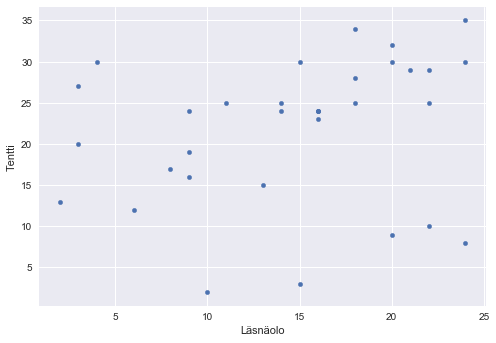

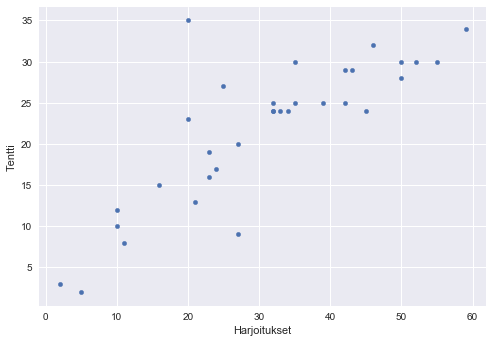

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('http://student.labranet.jamk.fi/~varpe/datananalk2019/kerta6/esim1.txt')
print(df.head())

df.plot.scatter('Läsnäolo', 'Tentti')
plt.show()

df.plot.scatter('Harjoitukset', 'Tentti')
plt.show()



Isommat merkit saa `s`-parametrilla ja läpikuultavat `alpha`-parametrilla.

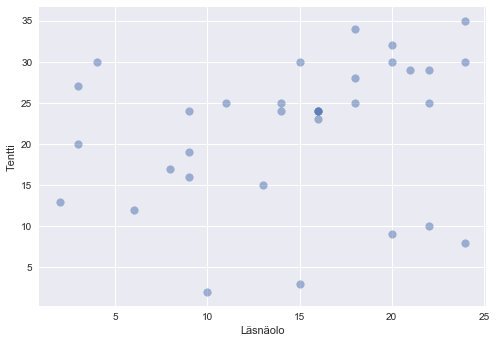

In [28]:
df.plot.scatter('Läsnäolo', 'Tentti', s=60, alpha=0.5)
plt.show()

Seabornin regplot (ja jointplot) tekevät hajontakaavion myös, ja pairplotilla saa useamman muuttujan väliset hajontakaaviot yhdellä komennolla.

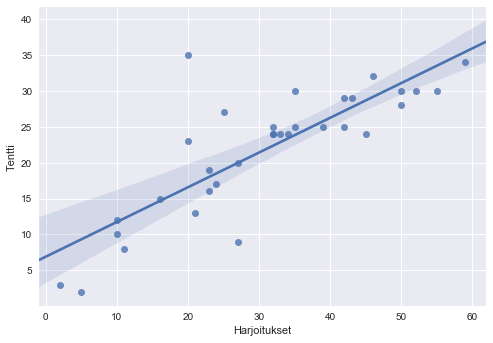

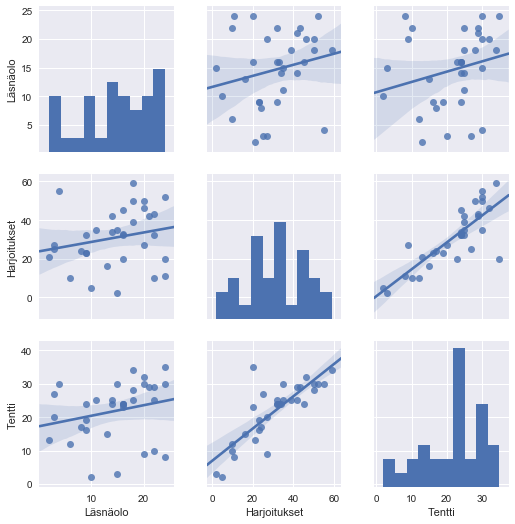

In [30]:
sns.regplot('Harjoitukset', 'Tentti', data=df)
plt.show()

sns.pairplot(df[['Läsnäolo', 'Harjoitukset', 'Tentti']].dropna(), kind='reg')
plt.show()

Esimerkin hajontakaavioissa läsnäolon ja tenttipisteiden välillä ei nähdä merkittävää yhteyttä, vaan havaintopisteet ovat melko satunnaisesti jakautuneet. Suoritetut harjoitustehtävät sen sijaan näyttävät olevan positiivisessa yhteydessä tenttipistemäärään. Hajontakaaviossa tämä näkyy selvästi nousevana pisteparvena. Alhaiset harjoitustehtävien määrät näyttävät liittyvän alhaisiin tenttipistemääriin ja korkeat harjoitustehtävien määrät näyttävät liittyvän korkeisiin tenttipistemääriin.

<a id='2'></a>
## Keskiarvo, varianssi ja keskihajonta
Yhden muuttujan jakaumaa yleisiä tunnuslukuja ovat keskiarvo ja keskihajonta:
* keskiarvo = arvojen summa/arvojen määrä
* varianssi = keskiarvosta poikkeamien neliöiden keskiarvo
* keskihajonta = varianssin neliöjuuri

Eli varianssia varten lasketaan kunkin arvon poikkeama keskiarvosta ja korotetaan se toiseen potenssiin. 

Pandasissa nämä saadaan DataFramen/Seriesin metodeilla `mean`, `var` ja `std`. Metodi `describe`antaa useita tunnuslukuja samalla kertaa

<a id='3'></a>
## Kovarianssi
Kovarianssia voidaan käyttää kahden muuttujan riippuvuuden mittana. Se kuvaa, kuinka läheisesti "muuttujat vaihtelevat yhdessä". Kovariassi lasketaan kaavalla  

![kovarianssi](https://wikimedia.org/api/rest_v1/media/math/render/svg/1dea006a812e72a1ea35d022c72a704424fc1a12)  

Eli se on keskiarvo muuttujien poikkeamien tulolle. 

Alla on valittu yksi piste ja piirretty sille poikkeamat:  
![cov1](http://student.labranet.jamk.fi/~varpe/datananalk2019/kerta6/cov/cov1.png)

Tälle siis poikkeaminen tulo on positiivinen (+ kertaa +).

Myös tälle pisteelle poikkeamien tulo on positiivinen (- kertaa -):  
![cov2](http://student.labranet.jamk.fi/~varpe/datananalk2019/kerta6/cov/cov2.png)

Sen sijaan tällä toinen poikkeama on positiivinen ja toinen negatiivinen joten tulo on negatiivinen:  
![cov3](http://student.labranet.jamk.fi/~varpe/datananalk2019/kerta6/cov/cov3.png)

Niinpä kovarianssi on positiivinen jos suuriin x:n arvoihin liittyy suuret y:n arvot ja pieniin x:n arvoihin pienet y:n arvot, eli pisteet ovat enimmäkseen näissä neljänneksissä:  
![cov4](http://student.labranet.jamk.fi/~varpe/datananalk2019/kerta6/cov/cov4.png)

Kovarianssi on negatiivinen, jos suuriin x:n arvoihin liittyy pienet y:n arvot ja päinvastoin:
![cov5](http://student.labranet.jamk.fi/~varpe/datananalk2019/kerta6/cov/cov5.png)

Jos sen sijaan arvot eivät "vaihtele yhdessä", eli jos suuriin x:n arvoihin liittyy sekä suuria että pieniä y:n arvoja, kovarianssi on lähellä nollaa (tulee positiivisia ja negatiivisia tuloja).

Kovarianssi saadaan pandasissa laskettua Seriesin `cov`-metodilla.

In [40]:
print(df['Läsnäolo'].cov(df['Tentti']))
print(df['Harjoitukset'].cov(df['Tentti']))
print(df['Läsnäolo'].cov(df['Harjoitukset']))

13.7821969697
106.548295455
21.3693181818


DataFramen `cov`-metodi antaa kovarianssimatriisin:

In [42]:
df.cov()

,Läsnäolo,Harjoitukset,Tentti
Läsnäolo,43.433712,21.369318,13.782197
Harjoitukset,21.369318,220.397727,106.548295
Tentti,13.782197,106.548295,76.820076


Jos aineistossa harjoitus-pistemäärät kerrotaan 10:llä, saadaan samanlainen hajontakaavio harjoitukset<->tentti, mutta kovarianssi kasvaa 10-kertaiseksi:

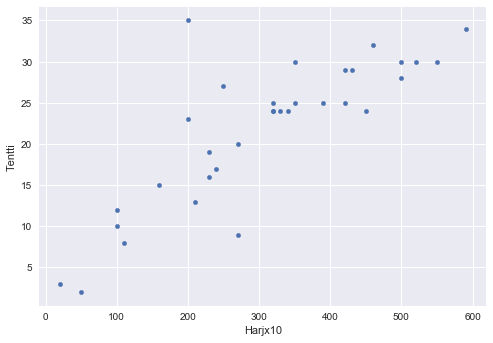

1065.48295455


In [79]:
df['Harjx10'] = df['Harjoitukset']*10

df.plot.scatter('Harjx10', 'Tentti')
plt.show()

print(df['Harjx10'].cov(df['Tentti']))

<a id='4'></a>
## Korrelaatio
Kovarianssin yksikkö on 'x:n yksikkö kertaa y:n yksikkö' ja kovarianssin suuruus ei kuvaa suoraan x:n ja y:n välistä riippuvuutta, koska se riippuu myös muuttujien hajontojen suuruudesta. 

Niinpä kovarianssi standardisoidaan välille [-1, 1] jakamalla se x:n ja y:n keskihajontojen tulolla. Tätä suuretta sanotaan **korrelaatiokertoimeksi** ja se kuvaa muuttujien välistä lineaarista riippuvuutta.

![pr1](http://student.labranet.jamk.fi/~varpe/datananalk2019/kerta6/pr.gif)

Tarkempi nimitys tälle on Pearsonin korrelaatiokerroin ja sen voidaan tulkita olevan muotoa:  
![pr2](http://student.labranet.jamk.fi/~varpe/datananalk2019/kerta6/pr2.png)


Mitä enemmän korrelaatiokerroin poikkeaa nollasta, sitä voimakkaampaa muuttujien välinen lineaarinen riippuvuus on:  
* arvo 1 tarkoittaa, että muuttujien välillä on täydellinen lineaarinen riippuvuus
* -1 tarkoittaa täydellistä negatiivista lineaarista riippuvuutta  
-> näissä tapauksissa toisen muuttujan voi laskea tarkasti lineaarisesti toisen arvosta.  
Riippumattomien muuttujien välillä korrelaatiota ei ole, eli korrelaatiokerroin on 0.

Seriesin `corr`-metodi antaa korrelaatiokertoimen parametrina annetun Seriesin kanssa (esim 2 DataFramen saraketta):

In [48]:
print(df['Läsnäolo'].corr(df['Tentti']))
print(df['Harjoitukset'].corr(df['Tentti']))
print(df['Harjx10'].corr(df['Tentti']))

0.23859844699
0.818852321976
0.818852321976


Nähdään (kuten hajontakaaviosta), että harjoituksilla on melko voimakas positiivinen korrelaatio tenttituloksen kanssa, läsnäololla ei niinkään.

Jos lasketaan harjoituspisteiden sijaan tekemättömät harjoitukset, saadaan luonnollisesti negatiivinen korrelaatio tenttituloksen kanssa:

-0.818852321976


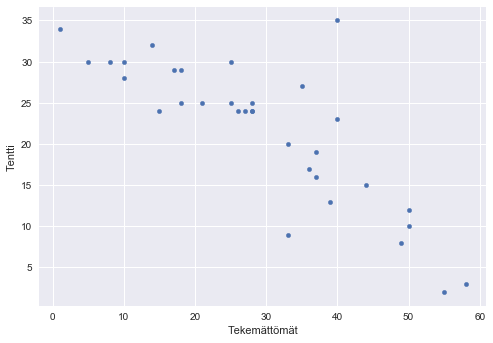

In [80]:
df['Tekemättömät'] = 60 -df['Harjoitukset']
print(df['Tekemättömät'].corr(df['Tentti']))

df.plot.scatter('Tekemättömät', 'Tentti')
plt.show()

DataFramelle `corr`-metodi laskee korrelaatiokerroinmatriisin:

In [56]:
df.corr().applymap("{:.2f}".format)

,Läsnäolo,Harjoitukset,Tentti,Harjx10,Tekemättömät
Läsnäolo,1.00,0.22,0.24,0.22,-0.22
Harjoitukset,0.22,1.00,0.82,1.00,-1.00
Tentti,0.24,0.82,1.00,0.82,-0.82
Harjx10,0.22,1.00,0.82,1.00,-1.00
Tekemättömät,-0.22,-1.00,-0.82,-1.00,1.00


'corrwith'-metodilla saadaan yhden Seriesin korrelaatio DataFramen kaikkiin sarakkeisiin:

In [58]:
df.corrwith(df['Tentti'])

Läsnäolo        0.238598
Harjoitukset    0.818852
Tentti          1.000000
Harjx10         0.818852
Tekemättömät   -0.818852
dtype: float64

[Esimerkkejä](https://fi.wikipedia.org/wiki/Korrelaatio#/media/File:Correlation_examples2.svg) erilaisten pistejoukkojen korrelaatiokertoimista.

<a id='5'></a>
## Selityskerroin
Usein raportoidaan myös Pearsonin korrelaatiokertoimen neliö (r^2). Esimerkiksi jos r^2 = 0.32 sanotaan, että selittävä muuttuja selittää 32 % selitettävän muuttujan varianssista.

In [62]:
df.corr().applymap(lambda x:"{:.1%}".format(x**2))

,Läsnäolo,Harjoitukset,Tentti,Harjx10,Tekemättömät
Läsnäolo,100.0%,4.8%,5.7%,4.8%,4.8%
Harjoitukset,4.8%,100.0%,67.1%,100.0%,100.0%
Tentti,5.7%,67.1%,100.0%,67.1%,67.1%
Harjx10,4.8%,100.0%,67.1%,100.0%,100.0%
Tekemättömät,4.8%,100.0%,67.1%,100.0%,100.0%


<a id='6'></a>
## Korrelaatiokertoimen "sudenkuoppia"

### Korrelaatio ei kerro syy-seuraussuhdetta
Korrelaatio voi olla pienestä otoksesta johtuva sattuma. Voi myös olla, että y on x:n syy tai päinvastoin, tai sitten jokin kolmas asia voi olla molempien syy, esimerkiksi hukkumisia tulee enemmän silloin kun syödään enemmän jäätelöä, mutta sää (kuumuus) on tietysti molempien taustalla.

### Korrelaatio mittaa vain lineaarista riippuvuutta
Muuttujien välillä voi olla riippuvuutta vaikka se ei olisikaan lineaarista, esim. y = x^2 -100x +2500 antaa suuria y:n arvoja pienillä ja suurilla x:n arvoilla

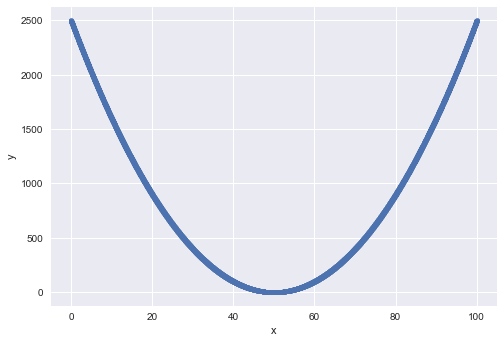

korrelaatiokerroin:  6.1661145453e-17


In [71]:
import numpy as np

df2 = pd.DataFrame({'x': np.linspace(0,100,10000)})
df2['y'] = df2['x']**2-100*df2['x']+2500

df2.plot.scatter('x','y')
plt.show()

print('korrelaatiokerroin: ', df2['x'].corr(df2['y']))  # korrelaatiokerroin 0

### Poikkeavat havaintoarvot
Yksittäiset poikkeavat havaintoarvot voivat vaikuttaa suuresti korrelaatiokertoimen arvoon, minkä vuoksi on suositeltavaa aina tulostaa tutkittavien muuttujien hajontakuvio.

   Läsnäolo  Harjoitukset  Tentti
0        20            50      30
1         6            10      12
2        18            59      34
3        18            50      28
4        14            42      25


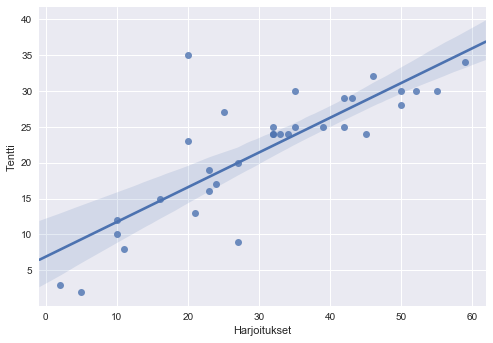

korrelaatiokerroin:  0.818852321976


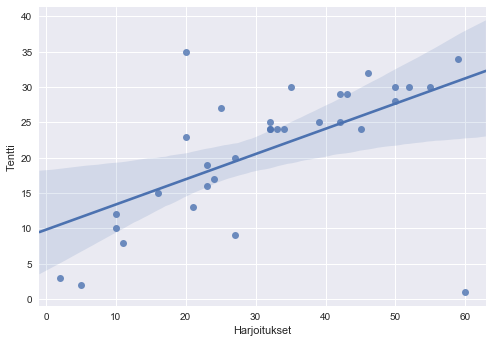

korrelaatiokerroin:  0.591621512186


In [143]:
df = pd.read_csv('http://student.labranet.jamk.fi/~varpe/datananalk2019/kerta6/esim1.txt')
print(df.head())

sns.regplot('Harjoitukset', 'Tentti', data=df)
plt.show()
print('korrelaatiokerroin: ', df['Harjoitukset'].corr(df['Tentti'])) 

df.iloc[-1] = [12,60,1] # muutetaan 1 arvo


sns.regplot('Harjoitukset', 'Tentti', data=df)
plt.show()
print('korrelaatiokerroin: ', df['Harjoitukset'].corr(df['Tentti'])) 

<a id='7'></a>
## Korrelaation merkitsevyys
Jos aineisto pohjautuu laajemmasta perusjoukosta satunnaisesti valittuun otokseen, niin tietyin edellytyksin voidaan yleistää otoksen tuloksia perusjoukkoon. Korrelaation tapauksessa tämä tarkoittaa muuttujien välisen korrelaation yleistämistä perusjoukkoon. 

Pienet korrelaatiot voidaan selittää otantavirheellä. Otoksessa havaitun korrelaation täytyy olla riittävän suuri, jotta se voidaan yleistää sen perusjoukkoon. Suuruutta testataan vertaamalla korrelaatiokerrointa hypoteettiseen tilanteeseen, jossa ei ole lainkaan korrelaatiota (korrelaatiokerroin on 0). Jos otoksesta laskettu korrelaatiokerroin poikkeaa riittävästi nollasta, niin korrelaatiota voidaan kutsua *tilastollisesti merkitseväksi*.

Korrelaatiokertoimen merkitsevyyden testaamiseksi lasketaan niin kutsuttu **p-arvo**, joka vastaa seuraavaan kysymykseen: *kuinka todennäköistä on saada havaitun suuruinen tai vielä kauempana nollasta oleva korrelaatiokertoimen arvo ilman että korrelaatiota on perusjoukossa?* Mitä pienempi p-arvo on sitä enemmän korrelaation yleistäminen perusjoukkoon saa tukea.

Vakiintuneen tavan mukaisesti alle 0,05 (5 %) suuruista p-arvoa pidetään riittävänä näyttönä perusjoukossa esiintyvän korrelaation puolesta.

p-arvoa ei saa pandasista mutta otetaan sitä varten käyttöön `scipy.stats` -ohjelmakirjasto, ja käytetään sen `pearsonr`-funktiota. Saadussa monikossa ensimmäinen luku on korrelaatiokerroin ja toinen sen p-arvo.

In [93]:
import scipy.stats as stats

df = pd.read_csv('http://student.labranet.jamk.fi/~varpe/datananalk2019/kerta6/esim1.txt')

print(stats.pearsonr(df['Harjoitukset'], df['Tentti']))

print(df.shape)

(0.81885232197558711, 5.7499518542094863e-09)
(33, 3)


eli jos perusjoukossa ei ole korrelaatiota on n. 0,000 000 6 %  todennäköisyys saada 33 alkoin otos jossa korrelaatiokerroin on yli 0,81 tai alle -0,81

#### demo
Demotaan p-arvoa "brute forcella", tehdään 10000 rivin DataFrame, johon arvotaan x ja y satunnaisesti.

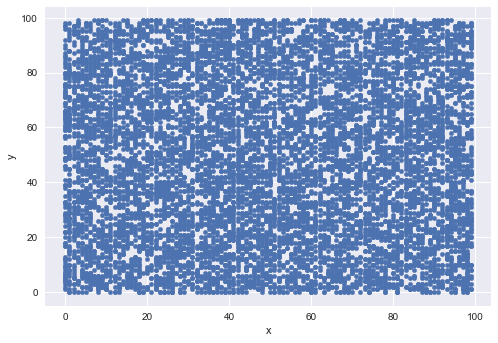

korrelaatiokerroin:  0.0033512984569


In [106]:
df3 = pd.DataFrame(np.random.randint(0,100,size=(10000, 2)), columns=['x','y'])

df3.plot.scatter('x','y')
plt.show()

print('korrelaatiokerroin: ', df3['x'].corr(df3['y'])) 


DataFramen `sample`-metodilla voidaan arpoa DataFramesta n rivin "näyte":

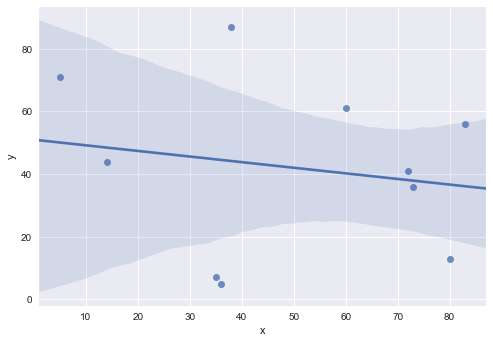

korrelaatiokerroin:  -0.180280563126


In [157]:
df4 = df3.sample(10)

sns.regplot('x','y', data=df4)
plt.show()
print('korrelaatiokerroin: ', df4['x'].corr(df4['y'])) 


Arvotaan tuhat 10 rivin näytettä, lasketaan näille korrelaatiokertoimet ja tehdään näistä Series: 

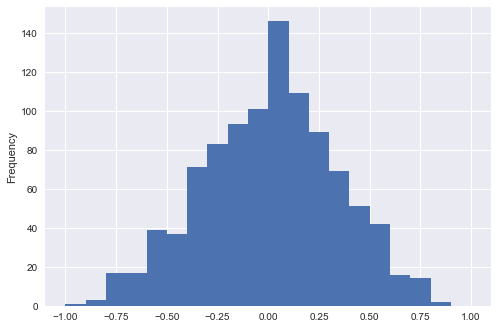

6


In [126]:
korrkt = []

for i in range(0,1000):
    df4 = df3.sample(10)
    korrkt.append(df4['x'].corr(df4['y']))

korrs = pd.Series(korrkt)    

korrs.plot.hist(bins=np.arange(-1,1.1,0.1))
plt.show()

print(len(korrs[(korrs<-0.8) | (korrs>0.8)]))

Tämän mukaan aineistosta, jossa korrelaatiokerroin on (lähes) nolla, otetuista 10 alkion otoksista n. 5,5% on sellaisia, joissa korrelaatiokerroin on alle -0,8 tai yli 0,8. Niinpä korrelaatiokertoimen 0,8 p-arvo kun n=10 on 0,0055.


Seabornin jointplot näyttää korrelaatiokertoimen ja sen p-arvon:

   Läsnäolo  Harjoitukset  Tentti
0        20            50      30
1         6            10      12
2        18            59      34
3        18            50      28
4        14            42      25


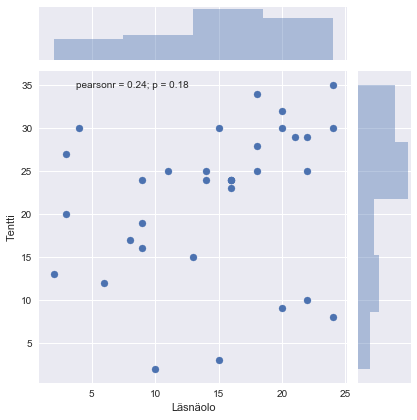

In [159]:
df = pd.read_csv('http://student.labranet.jamk.fi/~varpe/datananalk2019/kerta6/esim1.txt')
print(df.head())

sns.jointplot('Läsnäolo', 'Tentti', data=df)
plt.show()

<a id='8'></a>
## Spearmanin järjestyskorrelaatio
Jos korrelaatiokerroin lasketaan muuttujien arvojen sijaan niiden "sijoituksista", saadaan Spearmanin järjestyskorrelaatiokerroin eli "Spearmanin rho".

Tätä voidaan käyttää siis jo järjestysasteikollisille muuttuujille (missä arvojen välimatkat eivät ole mielekkäitä). Lisäksi Spearmanin järjestyskorrelaatiokerroin ei reagoi muuttujien suuriin poikkeamiin yhtä voimakkaasti kuin esimerkiksi Pearsonin korrelaatiokerroin.


In [127]:
df = pd.read_csv('http://student.labranet.jamk.fi/~varpe/datananalk2019/kerta6/esim1.txt')

print(df['Harjoitukset'].corr(df['Tentti'], method='spearman'))


0.795319741086


Saman voisi siis laskea sijoitusten pearson-korrelaationa:

0.795319741086


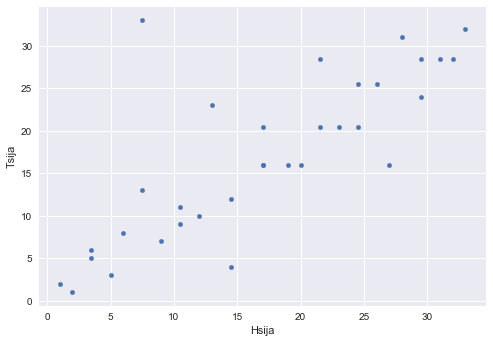

In [134]:
df['Hsija'] = df['Harjoitukset'].rank()
df['Tsija'] = df['Tentti'].rank()

print(df['Hsija'].corr(df['Tsija']))

df.plot.scatter('Hsija', 'Tsija')
plt.show()


Pearson:  0.818852321976
Spearman:  0.795319741086
Pearson:  0.099407108753
Spearman:  0.697987765987


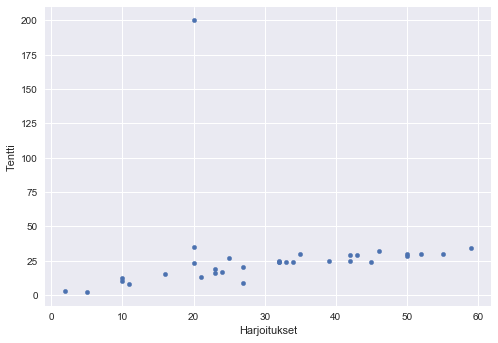

In [148]:
df = pd.read_csv('http://student.labranet.jamk.fi/~varpe/datananalk2019/kerta6/esim1.txt')


print("Pearson: ",df['Harjoitukset'].corr(df['Tentti']))
print("Spearman: ",df['Harjoitukset'].corr(df['Tentti'], method='spearman'))

# lisätään poikkeava arvo

df = pd.read_csv('http://student.labranet.jamk.fi/~varpe/datananalk2019/kerta6/esim1.txt')
df.iloc[-1] = [12,20,200] 

print("Pearson: ",df['Harjoitukset'].corr(df['Tentti']))
print("Spearman: ",df['Harjoitukset'].corr(df['Tentti'], method='spearman'))


df.plot.scatter('Harjoitukset', 'Tentti')
plt.show()

<a id='9'></a>
## Korrelaatiomatriisi heatmappina

Seaborn-kirjasto tarjoaa havainnollisen heatmap-"kuvaajaan" korrelaatiomatriisin visualisointiin:

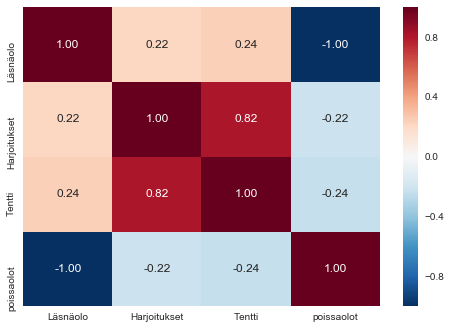

In [150]:
df = pd.read_csv('http://student.labranet.jamk.fi/~varpe/datananalk2019/kerta6/esim1.txt')

df['poissaolot'] = 24-df['Läsnäolo']

sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

Sama vanhalle kunnon Titanic-datasetille:

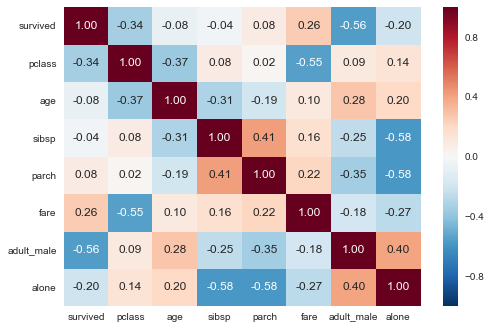

In [151]:
titanic = sns.load_dataset('titanic')
sns.heatmap(titanic.corr(), annot=True, fmt=".2f")
plt.show()

`annot=True` saa seabornin tulostamaan myös luvut ja `fmt=".2f"` määrittää ne 2 desimaalille